In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
from cereeberus import ReebGraph, MapperGraph, Interleave
import cereeberus.data.ex_mappergraphs as ex_mg

import matplotlib.pyplot as plt
import numpy as np

import pulp #for ILP optimization

In [10]:
# import the ilp file. Note it is in the same folder as this notebook, we will move it to the correct location later

import cereeberus.distance.ilp as ilp

## Load example MapperGraphs



Text(0.5, 1.0, 'G')

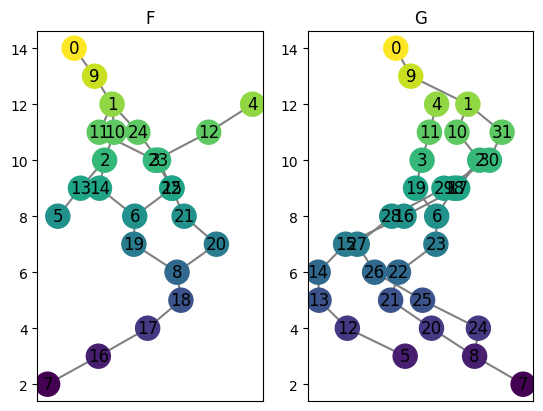

In [7]:
F = ex_mg.interleave_example_A()
G = ex_mg.interleave_example_B()
# F = ex_mg.torus(0, 2, 10, 12, delta = 1, seed = 17)
# G = ex_mg.line(0, 12)
plt.figure()
plt.subplot(121)
F.draw()
plt.title('F')
plt.subplot(122)
G.draw()
plt.title('G')

## Create the interleaving

In [8]:
myInt = Interleave(F, G,initialize_random_maps=True, seed = 17)


In [ ]:
ilp.solve_ilp(myInt)

/Users/ishikaghosh/anaconda3/envs/interleavingenv/lib/python3.13/site-packages/pulp/pulp.py:1298: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ishikaghosh/anaconda3/envs/interleavingenv/lib/python3.13/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/5f/m89pr_zs78n8ffl7t7ndknth0000gn/T/6bd0094c7e764822841c6a587c7ea726-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/5f/m89pr_zs78n8ffl7t7ndknth0000gn/T/6bd0094c7e764822841c6a587c7ea726-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 3684 COLUMNS
At line 14288 RHS
At line 17968 BOUNDS
At line 19046 ENDATA
Problem MODEL has 3679 rows, 1078 columns and 8448 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 8 - 0.00 seconds
Cgl0002I 528 variables fixed
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from 8 to -1.79769e+